# Forecasting Weekly Sales with Linear Regression

<h1 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #BBC4F9, #BBC4F9);">Abstract</h1>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #BBC4F9, #BBC4F9) 1;">
    <p><strong>Context:</strong> <br></br>
The sales and marketing teams aim to enhance sales forecasting and customer engagement and have requested an analysis of how temperature influences weekly coffee sales, along with weekly insights into transaction and product category performance. To support this, the team has provided data from three of their stores located in different areas of New York, NY, covering weeks 1 through 26 of 2023.
    </p>  
    <br><br/>
    <p>
    <strong>Objectives:</strong>
    </p>
    <ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;">Quantify how temperature influences weekly coffee sales.</li>
        <li style="margin-bottom: 10px;">Find weekly insights into transaction and product category performance.</li>
    </ul>
    <br/>
</div>

<h1 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #BBC4F9, #BBC4F9);">Data Dictionary</h1>

|Variable|Description|Data Type|
|-|-|:-:|
|transaction_id|Unique identifier for each transaction.|`int`|
|transaction_date|Date of the transaction.|`datetime`|
|transaction_time|Time of the transaction.|`str`|
|transaction_qty|Identifier for the store location.|`int`|
|store_id|ID of the store.|`int`|
|store_location|Location of the store.|`str`|
|product_id|Unit number within the store.|`int`|
|unit_price|Price of the product.|`float`|
|product_category|Category of the product.|`str`|
|product_type|Type of product within the category.|`str`|
|product_detail|Specific name of the product.|`str`|


<h1 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #BBC4F9, #BBC4F9);">Load Datasets</h1>

First load the operational and visualization packages that we'll use throughout the exploratory data analysis. Then, I will read the Coffee dataset from an `.xlsx` Excel file. Once the data is loaded, we will use the `.head( )` function to view the first three rows of the coffee dataframe. After that, we will check the datatype of each column in the coffee dataframe, as well as provide a quick check of the brief descriptive statistics for the numeric columns.

In [1]:
# Operational Packages
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime

# Viz Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset from xslx file 
coffee_df = pd.read_excel('Coffee Shop Sales.xlsx', engine='openpyxl')

In [3]:
# View the first three rows
coffee_df.head(3)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg


In [4]:
# Check the shape of coffee_df 
coffee_df.shape

(149116, 11)

In [5]:
# Check the info of the coffee_df 
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [6]:
# Check the descriptive statistics of the coffee_df dataframe.
coffee_df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


The **coffee_df** DataFrame contains 149,116 rows and 11 columns. The data types of these columns are as follows: datetime64[ns] (1), float64 (1), int64 (4), and object (5). There are no null values in the dataset.

<br>

While using the `.describe( )` function, I first check for any negative values in the `transaction_qty` and `unit_price` columns. Fortunately, there are no negative values in either of these columns. Next, I examine the maximum and minimum values of the `transaction_date` column to understand the date range of the dataset. However, the `max( )` and `min( )` functions for `transaction_date` don't indicate whether any dates are missing between **2023-01-01 and 2023-06-30**. To address this, I will generate a date range and check for any gaps. Now, let's move on to the exploratory data analysis section.

<br></br>

<br></br>

<h1 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #BBC4F9, #BBC4F9);">Exploratory Data Analysis</h1>

The first step in the **Exploratory Data Analysis** process is to identify null values across all columns. Leveraging the `.info( )` output from the previous section, and confirmed that no columns contain null values. However, the absence of null values in the `transaction_date` column does not necessarily mean the date sequence is complete. To verify, I compared the range of expected dates, from **2023-01-01 to 2023-06-30**, against the actual values in the `transaction_date` column. This analysis confirmed that no dates are missing within the specified range.

<br>

Next, I examined the dataset for duplicate entries, as duplicates can significantly skew results and lead to unreliable insights. A comprehensive check revealed no duplicate records, ensuring data integrity for further analysis. With these initial checks complete, I am confident in proceeding with a deeper exploration of the coffee dataset.

In [7]:
# Check for any Null Values
coffee_df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [8]:
# Check for any missing dates

# Create a date list from 2023-01-01 to 2023-06-30
full_date_range = pd.date_range(start='2023-01-01', end='2023-06-30')    


# Find the difference between the two list 
full_date_range.difference(coffee_df['transaction_date'])                        

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [9]:
# Check for any Duplicates
coffee_df.duplicated().sum()

0

<br></br>

<br></br>

In [10]:
# Coffee_df first 3 rows
coffee_df.head(3)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg


In [11]:
# Creat a new column call `week`
coffee_df['week'] = coffee_df['transaction_date'].dt.strftime('%Y-W%U')



# Creat a new column called `transaction_total` 
coffee_df['transaction_total'] = coffee_df['transaction_qty'] * coffee_df['unit_price']


# View first three rows
coffee_df.head(3)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,week,transaction_total
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-W01,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-W01,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-W01,9.0


Since the sales and marketing team has requested a focus on weekly insights into coffee sales and product performance, I will begin by creating a new column named week, derived from the `transaction_date` column. This will allow us to group and analyze the data on a weekly basis.

<br>

Additionally, to calculate the total sales for each transaction, I will create another column called `transaction_total` by multiplying `transaction_qty` and `unit_price`. This new column will provide the total revenue generated per transaction, enabling more in-depth analysis of sales trends.

<br></br>

<br></br>

<h1 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #BBC4F9, #BBC4F9);">EDA | Weekly Performance by Store Locations</h1>

**Create a Weekly Coffee Sales by Store Location** <br>

I called the `.groupby( )` function to group the data by `week` and `store_location.` Within this grouping, I aggregated the sum of the `transaction_total` and `transaction_qty` columns, and the count of `transaction_id`. This process provides a summary of weekly coffee sales segmented by week and store location.

In [12]:
# Group the data by week and store_locations
weekly_coffee_sales = coffee_df.groupby(['week','store_location']).agg({'transaction_qty':['sum'],
                                                                        'transaction_total':['sum'],
                                                                        'transaction_id':['count']}).reset_index()


# Change the Multi-index columns into single index columns
weekly_coffee_sales.columns = ['_'.join(col)  for col in weekly_coffee_sales.columns.values]


# Check the new weekly dataframe
weekly_coffee_sales.head(5)

,week_,store_location_,transaction_qty_sum,transaction_total_sum,transaction_id_count
0,2023-W01,Astoria,1893,5931.30,1328
1,2023-W01,Hell's Kitchen,1907,5874.35,1326
2,2023-W01,Lower Manhattan,1654,5203.35,1159
3,2023-W02,Astoria,1634,5384.51,1174
4,2023-W02,Hell's Kitchen,2103,6808.19,1468


<br></br>

<br></br>

**Rename the columns** <br>

I renamed the resulting columns with more intuitive column names to improve clarity for interpretation.

In [13]:
# Rename each columns 
weekly_coffee_sales.columns = ['week','store_loc', 'total_units_sold', 'total_sales', 'num_transactions' ]


# Check first five rows
weekly_coffee_sales.head(5)

,week,store_loc,total_units_sold,total_sales,num_transactions
0,2023-W01,Astoria,1893,5931.30,1328
1,2023-W01,Hell's Kitchen,1907,5874.35,1326
2,2023-W01,Lower Manhattan,1654,5203.35,1159
3,2023-W02,Astoria,1634,5384.51,1174
4,2023-W02,Hell's Kitchen,2103,6808.19,1468


<br></br>

<br></br>

**Calculate  the `Average Transaction Value (ATV)`** <br>

The **Average Transaction Value (ATV)** is a crucial metric for the sales and marketing team to assess sales performance. It provides insight into the average value generated per transaction and is calculated using the formula:


<br>

$$
\huge ATV = {\frac{Total \ \ Sales }{Number \ \ of \ \ Transactions}}
$$

<br>

In [14]:
# Calculate the ATV 
weekly_coffee_sales['ATV'] =  weekly_coffee_sales['total_sales'] / weekly_coffee_sales['num_transactions']
weekly_coffee_sales.head(3)

,week,store_loc,total_units_sold,total_sales,num_transactions,ATV
0,2023-W01,Astoria,1893,5931.30,1328,4.466340
1,2023-W01,Hell's Kitchen,1907,5874.35,1326,4.430128
2,2023-W01,Lower Manhattan,1654,5203.35,1159,4.489517


<br></br>

<br></br>

**Calculate the `Average Units per Transaction (AUT)`** <br>

Another valuable metric for the sales and marketing team is the **Average Units per Transaction (AUT)**. This metric indicates the average number of units sold per transaction, offering insights into the typical quantity of items purchased in a single transaction. The formula for calculating AUT is:

<br>

$$
\huge AUT = {\frac{Total \ \ Units \ Sold}{Number \ \ of \ \ Transactions}}
$$

<br>


In [15]:
# Calculate the AUT
weekly_coffee_sales['AUT'] = weekly_coffee_sales['total_units_sold'] / weekly_coffee_sales['num_transactions']
weekly_coffee_sales.head(3)

,week,store_loc,total_units_sold,total_sales,num_transactions,ATV,AUT
0,2023-W01,Astoria,1893,5931.30,1328,4.466340,1.425452
1,2023-W01,Hell's Kitchen,1907,5874.35,1326,4.430128,1.438160
2,2023-W01,Lower Manhattan,1654,5203.35,1159,4.489517,1.427092


<br></br>

<br></br>

**Creating Plots for Analysis** <br>

Here, I will create three plots to illustrate the following:
* `Plot 1`: Weekly Total Sales from Week 1 to Week 26 across all three stores. 
* `Plot 2`: Weekly Average Transaction Value (ATV) for all three stores.
* `Plot 3`: Weekly Average Units per Transaction (AUT) for all three stores. 

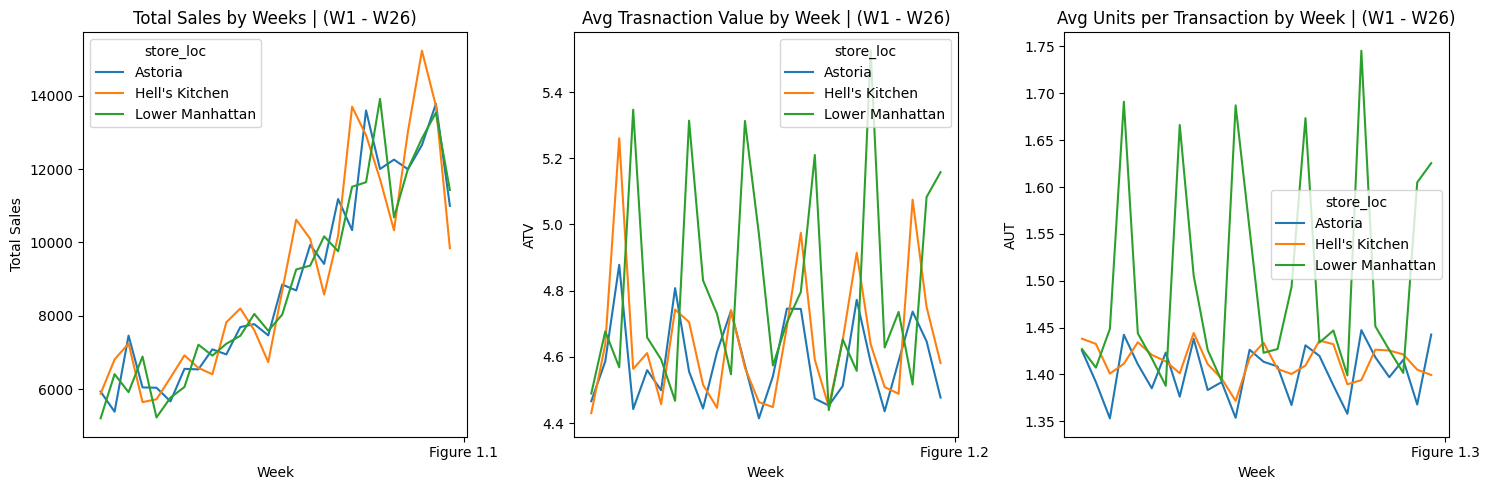

In [16]:
# Creat subplots
fig, axes = plt.subplots(1, 3, figsize=(15,5))

# plot Figure 1.1: Total Sales by Week 
sns.lineplot(data=weekly_coffee_sales, x='week', y='total_sales', hue='store_loc', ax=axes[0])
axes[0].set_title('Total Sales by Weeks | (W1 - W26)')
axes[0].set_xlabel('Week')
axes[0].set_ylabel('Total Sales')
axes[0].set_xticks('Figure 1.1')


# Plot Figure 1.2: Avg Trasnaction Value by Week 
sns.lineplot(data=weekly_coffee_sales, x='week', y='ATV', hue='store_loc', ax=axes[1])
axes[1].set_title('Avg Trasnaction Value by Week | (W1 - W26)')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('ATV')
axes[1].set_xticks('Figure 1.2')


# Figure 1.3:  Avg Units per Transaction by Week by Week
sns.lineplot(data=weekly_coffee_sales, x='week', y='AUT', hue='store_loc', ax=axes[2])
axes[2].set_title('Avg Units per Transaction by Week | (W1 - W26)')
axes[2].set_xlabel('Week')
axes[2].set_ylabel('AUT')
axes[2].set_xticks('Figure 1.3')


# show plots

plt.tight_layout()
plt.show()

***Figure 1.1*** <br>
<br>
***Figure 1.1*** illustrates the trends in total revenue generated by the three stores over the first 26 weeks. The `total_sales` of coffee show an upward trajectory across all stores as the weeks progress. **Weeks W1–W13 correspond to January through March**, while **W14–W26 represent April through June**. Notably, `total_sales` experience a rapid increase around Week 14, marking the transition to April, with this growth trend continuing steadily through the end of June.

<br></br>

***Figure 1.2***  <br>
<br>
***Figure 1.2***  compares the average revenue per transaction over the first 26 weeks across three different store locations. Observing the trends, the **Average Transaction Value (ATV)** exhibits a fluctuating pattern of increases and decreases for all three stores throughout this 26 Weeks period. Among the locations, the Lower Manhattan store consistently records the highest Average Transaction Values weekly.

<br></br>

***Figure 1.3***  <br>
<br>
***Figure 1.3*** illustrates purchasing patterns by displaying the weekly average number of items bought per transaction for each store. All three stores exhibit a fluctuating pattern in their weekly **Average Units per Transaction (AUT)**. Among them, the Lower Manhattan store consistently shows a higher weekly average number of units per transaction over the first 26 weeks.
<br></br>

<br></br>

<br></br>

<h1 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #BBC4F9, #BBC4F9);">EDA | Weekly Performance by Categories</h1>

In this section, I will first create two subset dataframes: **weekly_category_performance** and **average_category_performance**. Then, I will plot side-by-side visualizations to compare category performance in terms of sales revenue and units sold.

* `weekly_category_performance`: Category performance for each week.
* `average_category_performance`: Average category performance (weekly).

<br></br>

<br></br>

**Create a New Subset Dataframe: `Weekly_category_performance`** <br>

Here, I created a new subset dataframe called **weekly_category_performance** by aggregating `transaction_total`(s) and `transaction_qty` for each `category` on a weekly basis. This subset dataframe provides insights into the performance of each category over the 26-week period..

In [17]:
# Subset a weekly categories perfomance df using .groupby( )
weekly_category_performance = coffee_df.groupby(['week','product_category']).agg({'transaction_total':['sum'], 
                                                                              'transaction_qty':['sum']}).reset_index()

# Rename each columns in the new df
weekly_category_performance.columns = ['week', 'category', 'sales_revenue', 'units_sold'] 


# Sort df by 'category' and then by 'week' in ascending order 
weekly_category_performance = weekly_category_performance.sort_values(by=['category','week'], ascending=True).reset_index(drop=True)


# print the shape of the new df
print('weekly_cate_performance Shape: ', weekly_category_performance.shape, '\n')


# Show first 3 rows 
weekly_category_performance.head(5)

weekly_cate_performance Shape:  (233, 4) 



,week,category,sales_revenue,units_sold
0,2023-W01,Bakery,1876.00,528
1,2023-W02,Bakery,2387.04,664
2,2023-W03,Bakery,2358.75,670
3,2023-W04,Bakery,2034.05,580
4,2023-W05,Bakery,2057.41,582


<br></br>

<br></br>

**Create a New Subset Dataframe:** <br>

This **average_category_performance** subset dataset captures the Average Category Performance (week).

In [18]:
# Calculate the average of transaction_total (sales revenue) , transaction_qty (units sold) for each category
average_category_performance = weekly_category_performance.groupby(['category']).agg({'sales_revenue':'mean', 'units_sold':'mean'}).reset_index()


# Rename the columns
average_category_performance.columns = ['category', 'sales_revenue', 'units_sold']


# Display the new subset df 
average_category_performance

,category,sales_revenue,units_sold
0,Bakery,3165.986154,892.846154
1,Branded,544.280000,31.040000
2,Coffee,10382.786538,3432.692308
3,Coffee beans,1541.740385,70.307692
4,Drinking Chocolate,2785.230769,671.423077
5,Flavours,323.415385,404.269231
6,Loose Tea,431.292308,46.538462
7,Packaged Chocolate,169.524615,18.730769
8,Tea,7554.075000,2682.192308


<br></br>

<br></br>

**Sales by Category**

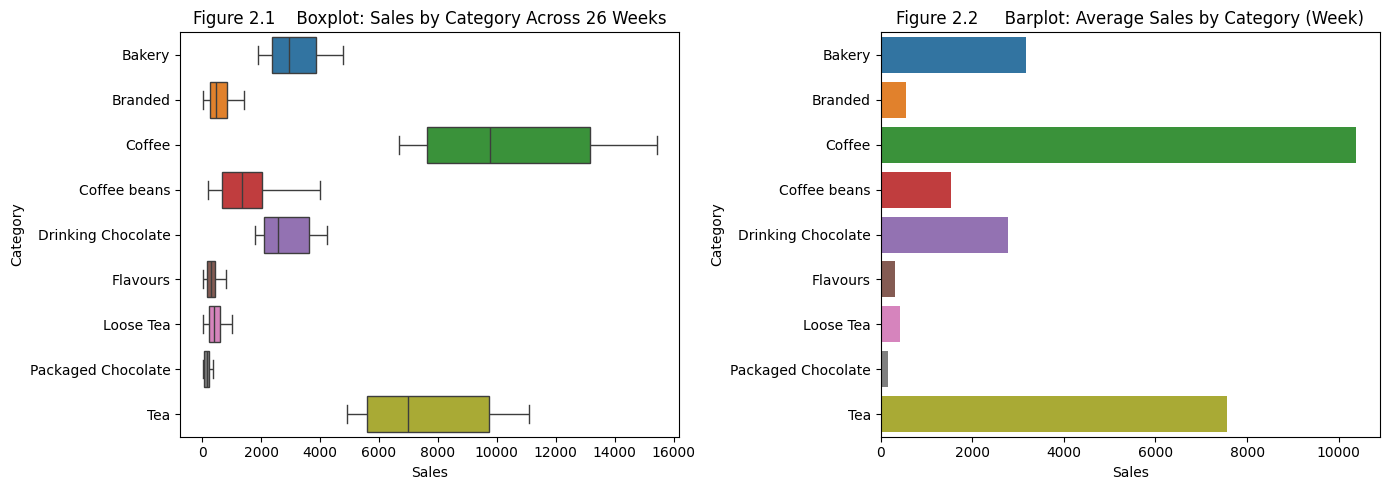

In [19]:
# Creat subplots
fig, axes = plt.subplots(1,2, figsize=(14,5))

# A Boxplot on sales revenue by category
sns.boxplot(data=weekly_category_performance, x='sales_revenue', y='category', hue='category', showfliers=False, ax=axes[0])
axes[0].set_title('Figure 2.1    Boxplot: Sales by Category Across 26 Weeks')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Category')


# A Barplot on average sales by category
sns.barplot(data=average_category_performance, x='sales_revenue', y='category', hue='category', ax=axes[1])
axes[1].set_title('Figure 2.2     Barplot: Average Sales by Category (Week)')
axes[1].set_xlabel('Sales')
axes[1].set_ylabel('Category')


plt.tight_layout()
plt.show()

***Figure 2.1*** <br>

The boxplot illustrates the distribution of weekly sales revenues for each category over 26 weeks. The highest weekly coffee `sales` revenue is approximately `$16,000`, while the lowest is around `$7,000`. **The right-skewness of the boxplot suggests that**, for most categories, the majority of weekly sales fall below the average sales per week, indicating that higher sales values are less frequent.

<br>

***Figure 2.2*** <br>

Based on the Barplot, coffee `sales` are the primary source of sales revenue, with an average weekly sales revenue of approximately `$10,500`. Tea sales rank second, with an average weekly revenue of around `$7,500`. This suggests that coffee and tea are the top-performing categories, indicating their popularity among customers.

<br></br>

<br></br>

**Units Sold by Category**

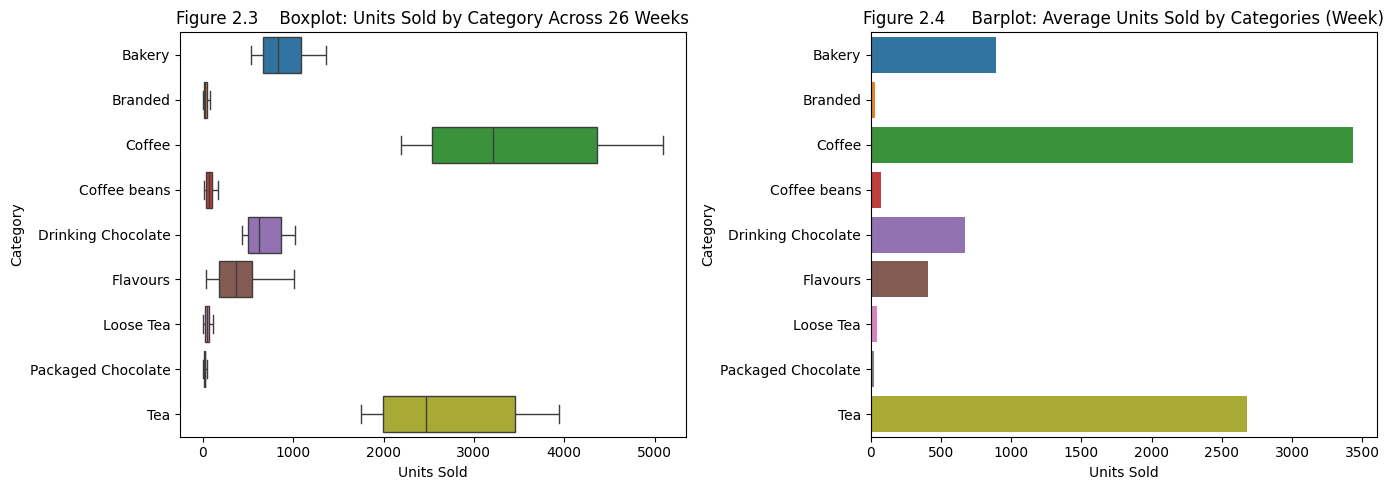

In [20]:
# Creat subplots
fig, axes = plt.subplots(1,2, figsize=(14,5))

# 
sns.boxplot(data=weekly_category_performance, x='units_sold', y='category', hue='category', showfliers=False, ax=axes[0])
axes[0].set_title('Figure 2.3    Boxplot: Units Sold by Category Across 26 Weeks')
axes[0].set_xlabel('Units Sold')
axes[0].set_ylabel('Category')


# 
sns.barplot(data=average_category_performance, x='units_sold', y='category', hue='category', ax=axes[1])
axes[1].set_title('Figure 2.4     Barplot: Average Units Sold by Categories (Week)')
axes[1].set_xlabel('Units Sold')
axes[1].set_ylabel('Category')




plt.tight_layout()
plt.show()

***Figure 2.3*** <br>

The box plot displays the distribution of weekly units sold across each category over a 26-week period. The highest number of weekly units sold for coffee is approximately `5,200 units`, while the lowest is around `2,200 units`. The right-skewness of the boxplot indicates that, for most categories, the majority of weekly units sold are concentrated below their average, suggesting that higher sales occur less frequently.

<br>

***Figure 2.4*** <br>

The bar plot highlights that `coffee` accounts for the largest proportion of product units sold, with an average weekly sales volume of approximately `3,400 units`. `Tea` ranks second, with an average weekly sales volume of around `2,700 units`. These findings suggest that `coffee` and `tea` are the top-performing categories, reflecting their strong popularity among customers.

<br></br>

<br></br>

<h1 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #BBC4F9, #BBC4F9);">Linear Regression Model Assumptions</h1>

To develop a **Regression Model** for predicting total weekly sales across all three stores combined and to assess the impact of `temperature` on coffee `sales`, I faced a challenge: the dataset provided by the sales and marketing team missing data on `temperature`. After reaching out to sales and marketing team, it was confirmed that temperature data was not recorded during the transactions.

<br>

To address this, I retrieved average weekly **temperature data** for the New York City area from [**Weather Underground**](https://www.wunderground.com/about/data), covering the period **from 2023-01-01 to 2023-06-30**. This timeframe aligns perfectly with the coffee dataset. Since all three stores are located in New York City, using this [**Data**](https://www.wunderground.com/history/weekly/us/ny/new-york-city/KLGA/date/2023-6-30) as a proxy for temperature is both reasonable and consistent with the requirements of the analysis.


<br>

|**Variable**|**Description**|**Data Type**|
|-|-|:-:|
|avg_temp|Average weekly temperature in Fahrenheit.|`float`|


<br></br>

In [21]:
# Load the weekly temperature dataset 
temperature_wk = pd.read_csv('nyc_weekly_temp_f')
temperature_wk.head(3)

,avg_temp
0,53.79
1,48.18
2,47.67


In [22]:
# Creat a subset by aggergating the sum for sales by weeks
coffee_wk = coffee_df.groupby(['week']).agg({'transaction_total':['sum']}).reset_index()
coffee_wk.head(3)

,week,transaction_total
,,sum
0,2023-W01,17009.00
1,2023-W02,18600.35
2,2023-W03,20618.89


<br></br>

<br></br>

**Concatenate Dataframes & Feature Enginneering**

For this step, I concatenated the **coffee_wk** and **temperature_wk** dataframes into a single dataframe and reassigned the result back to **coffee_wk**. Next, I renamed the columns as needed to ensure consistency. After that, I applied **Feature Transformation** by taking the logarithm of the `sales` and storing the result in a new column called `log_sales`.

In [23]:
# Concat the temperature df and coffee_wk
coffee_wk = pd.concat([coffee_wk, temperature_wk], axis=1)


# Rename the columns
coffee_wk.columns = ['week', 'sales', 'temperature']


# Create a new column call `log_sales` by taking the logarithmn of sales column
coffee_wk['log_sales'] = np.log(coffee_wk['sales'])


# Print the shape of the new coffee_wk
print('coffee_wk Shape: ', coffee_wk.shape, '\n')

# Display the first 3 rows of coffee_wk
coffee_wk.head(3)

coffee_wk Shape:  (26, 4) 



,week,sales,temperature,log_sales
0,2023-W01,17009.00,53.79,9.741498
1,2023-W02,18600.35,48.18,9.830936
2,2023-W03,20618.89,47.67,9.933963


<br>

The purpose of applying a logarithmic transformation to the `sales` data is to address the highly skewed nature of economic variables. Taking the logarithm compresses large values and stretches smaller ones, which helps to approximate a normal distribution. Although the distribution of the dependent variable is typically not a concern for linear regression models, in this context where the dependent variable is skewed and the sample size is relatively small (n < 30), taking the logarithm of sales can stabilize variance and improve the interpretability of the model.

<br></br>

<br></br>

**Check the Assumptions for Linear Regressions** <br>

There are four assumptions we need to check for **Linear regression model**. The **Linearitry** and **Indepdent Observation** assumptions can be check before the model is build, but for **Normality** and **Homoscedasity** can only be checked after the model is build. Since the goal is to make a linear regression model that predict `sales` based on `temperature`. Our indepedent variable will be `temperature` and depedent variable will be `log_sales`.


* Linearity
* Normality
* Independent Observation
* Homoscedasticity

<br></br>

<br></br>

**Checking the `Linearity Assumption`**

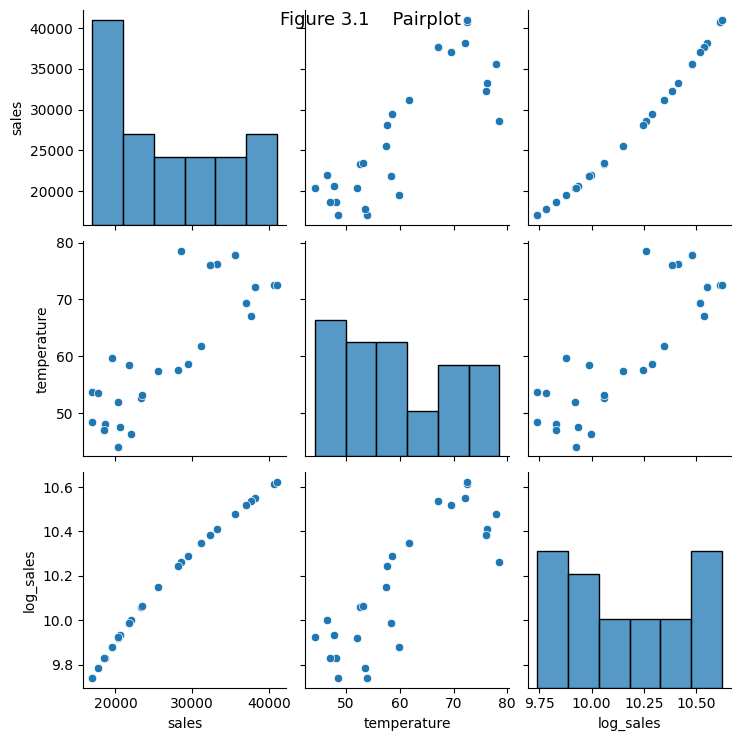

In [24]:
# Creat a pairplot to Cheeck Linearty Assumption
sns.pairplot(coffee_wk)
plt.suptitle("Figure 3.1    Pairplot", size=13)  
plt.show()

***Figure 3.1*** <br>

From the pairplot, despite the small sample size, we observe a positive correlation between `log_sales` and `temperature`. Therefore, the **Linearity Assumption is satisfied**.

<br></br>

<br></br>

**Checking the `Independent Observation Assumption`** <br>

For the independence assumption, our observations are recorded per transaction, meaning each transaction is independent and not influenced by any other.
Therefore, the **Independent Observation Assumption is satisfied**.

<br></br>

<br></br>

<h1 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #BBC4F9, #BBC4F9);">Building the Linear Regression Model</h1>

In [25]:
# Import the Operational package
from sklearn.model_selection import train_test_split


# Import the Statistical packages
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols

The `train_test_split( )` function from **scikit-learn**, which allows me to split the data into **training and testing datasets**. The training dataset is used to train the model, while the test dataseting is used to test the model's performance. Additionally, there is a validation dataset, which consists of unseen data used to evaluate how well the model performs on new, real-world scenarios.

<br>

The `ols` formula from **stasmodels**, allow me to use **Ordinary Least Squared (OLS)**, a method that minimizes the sum of squared residuals to estimate the parameters of the best-fit line in a **Linear Regression Model**.

<br></br>

<br></br>

**Split the Data**

Splitting the data involves separating the dataframe into the dependent variable, `log_sales` (denoted as y), and the selected independent variable(s), in this case, `temperature` (denoted as X). 

After separating the data into **X** and **y**, use the `train_test_split()` function to divide **X** into `X_train` and `X_test` and **y** into `y_train` and `y_test`, reserving 20% of both **X** and **y** as test set.

In [26]:
# save a copy of coffee_wk as X
X = coffee_wk.copy()
X = X.drop(columns=['sales','log_sales'])      # Select indepedent variables or predictors we want for our model


# Isolate the dependent variable / response variable
y = coffee_wk['log_sales']


# split the data into Train, Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=2025)

<br></br>

<br></br>

**Build the model then fit the model**

In [27]:
# ols_data 
ols_data = pd.concat([X_train, y_train], axis=1)


# ols_formula
ols_formula = "log_sales ~  temperature"


# Fit the model
model = ols(data=ols_data, formula=ols_formula).fit()


# Save the ols test result summary
model_result = model.summary()


# show test result summary
model_result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     52.80
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           9.38e-07
Time:                        18:46:13   Log-Likelihood:                 8.5121
No. Observations:                  20   AIC:                            -13.02
Df Residuals:                      18   BIC:                            -11.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.7306      0.203     43.027      0.000       8.304       9.157
temperature     0.0235      0.003      7.266      0.000       0.017       0.030
==============================================================================
Omnibus:                        2.208   Durbin-Watson:                   2.232
Prob(Omnibus):                  0.332   Jarque-Bera (JB):                1.227
Skew:                          -0.265   Prob(JB):                        0.542
Kurtosis:                       1.909   Cond. No.                         342.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>

***OLS Regression Results*** <br>

The **P-value** for both `intercept` and the `temperature` coeffiecent are less the **standard significant level 0.05**, this indicates the p-value associateed with the coefficient estimates. With a 95% confidence interval around the coefficient estimates. The coefficent estimate for `temperature` is 0.0235 with a **P-value** of 0.000 and a **confidence interval** from 0.017 to 0.030.  

<br>

The **OLS model** returned a **R-squared** of 0.746. This means that `temperature` explains about 74.6% of the variance in `log_sales`. There is still 25.4% of the variance in `log_sales` remain unexplained by the model. This variance are likely due to other factors like store traffic, and etc.

<br></br>


**Log Sales Prediction Formula:**

<br>

$$
\huge Log \ Sales = 8.7306 + 0.0235 * {\beta}_{\ temperature}
$$

<br>

To interpret the formula: for every one-degree increase in Fahrenheit, `log_sales` increases by 0.0235. However, since `log_sales` is not directly interpretable or actionable for the sales and marketing team, we need to transform the `log_sales` formula back into the original `sales` scale.

<br></br>

<br></br>

**Sales Prediction Formula:**

<br>

$$
\huge Sales = 6,181.69 * e^{ \ 0.0235 \ * {\ \beta}_{\ temperature}}
$$

<br>

After converting the `log_sales` formula back to the `sales` scale, and the interpretation is: **for every one-degree increase in Fahrenheit, `sales` increase by approximately 2.38%**.
<br></br>

<br></br>

<br></br>

<h1 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #BBC4F9, #BBC4F9);">Normality | Shapiro-Wilk Test</h1>

Now that the **Linear Regression Model** is built, we can check the **normality assumption**. First, we compute the **residuals**, then predict the **fitted values** using the **X_test** data. Fitted values, in other words, are the predictions made by our model based on the testing data `X_test`.

In [28]:
# Calculate the Residuals
residuals = model.resid


# Predict the log_sales with X_test data
fitted_values = model.predict(X_test)

<br></br>

**Checking the `Normality Assumption` Using Visualizations** <br>

The two plots that are used here are: histogram and quantile-quantile plot. both plots can help us assess whether or not the Normality assumption is satistified. histogram, qqplot can tell if the distribution of the residuals are normally distributed.

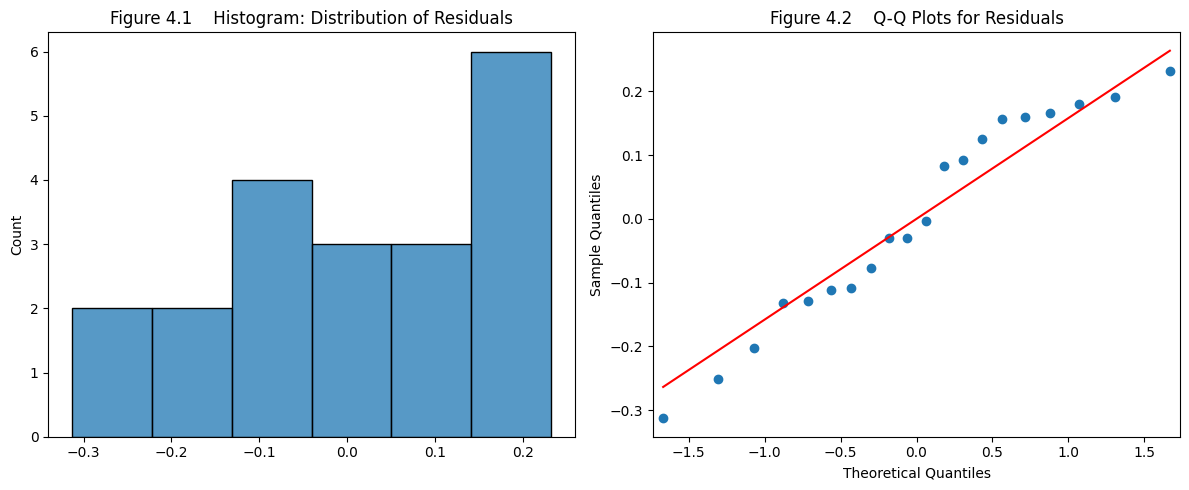

In [29]:
# Subplot
fig, axes = plt.subplots(1,2, figsize=(12,5))


# Plot residuals distribution in a histogram
sns.histplot(residuals, ax=axes[0])
axes[0].set_title('Figure 4.1    Histogram: Distribution of Residuals')


# Plot the Q-Q plot of the residuals
sm.qqplot(residuals, line='s', ax=axes[1]);
axes[1].set_title('Figure 4.2    Q-Q Plots for Residuals')


plt.tight_layout()
plt.show()

In [30]:
# Check the Skewness of residuals histogram
stats.skew(residuals, axis=0, bias=True)

-0.2653959274265847

<br>

***Figure 4.1*** <br>

The **histogram** approximately follows a normal distribution, though there appears to be a slight left skew. At this point, it's difficult to definitively conclude whether the residuals are normally distributed. However, using the `.skew( )` function from scipy.stats, the residuals show a **skewness score of -0.2093**. Typically, a skewness score between -0.5 and 0.5 is considered roughly a symmetric distribution.

<br>

***Figure 4.2*** <br>

From the **QQ-plot**, we observe that the points are generally aligned with the reference line, though not perfectly. It is challenging to conclusively confirm the normality assumption based solely on the QQ-plot. Therefore, I will use the Shapiro-Wilk test to formally assess whether the residuals follow a normal distribution.

<br></br>

<br></br>

**Check the Normality Assumption with Shapiro-Wilk Test**

The **Shapiro-Wilk Test** is best used to assess whether the data is normally distributed, particularly with a sample size of less than 50 (n < 50). It is based on the W-statistic. When the W-statistic is closer to 1, it indicates that the data is likely normally distributed. If a W-statistic significantly lower than 1 suggests that the data deviates from normality. Since our sample size is less than 30, it is appropriate to use the Shapiro-Wilk test to assess the **normality assumption**.

<br></br>

**Shapiro-Wilk Test**
* **`Null Hypothesis`**: The residuals is normally distributed.
* **`Alt  Hypothesis`**: The residuals is NOT normally distributed.

In [31]:
# import the Shapiro-Wilk Test
from scipy.stats import shapiro


# Stanard Significant level
significant_lv = 0.05


# Save the results into stats and p_values
w_stat, p_value = shapiro(residuals)


# print W-statistic & P-value
print('W Statistics: ', w_stat)
print('P-Value:      ', p_value)

W Statistics:  0.9410913491226995
P-Value:       0.25142441051249753


In [32]:
# Define a helper function to check hypothesis result
def hypothesis_result(pvalue, signficant_level):

    '''
    Checks the result of a hypothesis test, by comparing the P-value & Significant Level.

        Parameters: 
            pvalue            (num) : P-value of a hypothesis test
            signfifcant_level (num) : significant level, (EX: 0.10, 0.05, 0.01) 0.05 is standard
    '''
    
    if pvalue > signficant_level:
        print('Fail to Reject the Null Hypothesis.')
    else:
        print('Reject the Null Hypothesis.')

In [33]:
# Call the Hypothesis Result function 
hypothesis_result(p_value, significant_lv)

Fail to Reject the Null Hypothesis.


</br>

***Shapiro-Wilk Test Results*** <br>

Since the **Shapiro-Wilk Test** fails to reject the null hypothesis, it suggests that the residuals are normally distributed, **satisfying the normality assumption**.

<br></br>

<br></br>

<h1 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #BBC4F9, #BBC4F9);">Homoscedacity | Breusch-Pagan Test</h1>

The **Breusch-Pagan test** is a statistical test used to detect heteroscedasticity in a linear regression model. It tests whether the variance of the residuals depends on the independent variables.


* **`Null Hypothesis`**: The residuals exhibits homoscedasticity (constant variance is constant).
* **`Alt  Hypothesis`** : The residuals exhibits heteroscedasticity (variance is not constant).

In [34]:
# Import the Breusch-Pagan Test
from statsmodels.stats.diagnostic import het_breuschpagan


# Significant level
significant_lv = 0.05


# Breusch-Pagan Test
lm_stat, p_value, f_value, f_p_value = het_breuschpagan(model.resid, model.model.exog)
print('Langrange Multiplier Statistic: ', lm_stat)
print('P-Value  : ', p_value)
print('F-Value  : ' , f_value)
print('F P-Value: ' , f_p_value)

Langrange Multiplier Statistic:  2.269997266729653
P-Value  :  0.1319001349187839
F-Value  :  2.3045653977514657
F P-Value:  0.14636250715787902


In [35]:
# Call the hypothesis result function
hypothesis_result(p_value, significant_lv)

Fail to Reject the Null Hypothesis.


<br>

***Breusch-Pagan Test Results*** <br>

Since the **Breusch-Pagan Test** fails to reject the null hypothesis, it indicates that the residuals exhibit homoscedasticity (constant variance). This suggest that the residuals has a no pattern spread, meaning that thier variability remains consistant across the range of predicted values. Therefore, **Homoscedasticity Assumption is statistfied**.

<br>

Now that the **four assumptions for linear regression have been verified**, we can confidently proceed with interpreting the regression coefficients and summarizing the model results.

<br></br>

<h1 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #BBC4F9, #BBC4F9);">Summary</h1>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #BBC4F9, #BBC4F9) 1;">
    <p>
    <strong>Objectives 1:</strong> Quantify how temperature influences weekly coffee sales.
    </p>
    <ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;">After a linear regression analysis, a significant positive correlation between temperature and weekly coffee sales was identified. According to the model's prediction, weekly coffee sales rise by approximately 2.38% for every 1°F increase in temperature. This finding highlights the impact of temperature on consumer purchasing behavior, providing actionable insights to optimize inventory management and develop targeted marketing strategies that respond to weather-related demand changes.</li>
        <li style="margin-bottom: 10px;"><strong>Sales Prediction Formula:</strong>
$$
\huge Sales = 6,181.69 * e^{ \ 0.0235 \ * {\ \beta}_{\ temperature}}
$$</li>
    </ul>
        <br><br/>
        <br><br/>
    <p>
    <strong>Objectives 2:</strong> Find weekly insights into transaction and product category performance.
    </p>
    <ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;">In terms of category performance, coffee stands as the dominant revenue driver, followed closely by tea, with both categories significantly outperforming all other product lines. Bakery items contribute a strong revenue but remain secondary to coffee and tea. Drinking chocolate shows moderate success, generating more revenue than the lower-performing categories, such as branded products and coffee beans, which contribute minimally to the overall sales.</li>
        <li style="margin-bottom: 10px;"><strong>Recommendation:</strong><br>
            <br>
Focus on Coffee and Tea, given their dominant performance, there is significant potential to further enhance sales in these categories. Expanding the product range, introducing limited-time promotions, or offering seasonal varieties can help capitalize on their popularity, attract more customers, and drive sustained growth.</li>
    </ul>
    <br/>
</div>